In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

# Load the CSV files into pandas DataFrames
ada_df = pd.read_csv("ada_Prompt.csv")
curie_df = pd.read_csv("curie_Prompt.csv")
davinci_df = pd.read_csv("davinci_Prompt.csv")
turbo_df = pd.read_csv("turbo_Prompt.csv")

# Add a 'Model' column to identify the source of the data
ada_df['Model'] = 'ada'
curie_df['Model'] = 'curie'
davinci_df['Model'] = 'davinci'
turbo_df['Model'] = 'turbo'


# Combine the DataFrames
combined_df = pd.concat([ada_df, curie_df, davinci_df, turbo_df], ignore_index=True)

# Reorder columns for the desired format
column_order = ['Name', 'Model','Generated_Texts', 'F1_Score', 'Rouge1', 'Rouge2', 'RougeL', 'Length', 'Vec2', 'Bleu']
combined_df = combined_df[column_order]

# Create a new DataFrame with alternating rows of models for each author
alternating_rows = pd.DataFrame()
for name in combined_df['Name'].unique():
    author_data = combined_df[combined_df['Name'] == name]
    for model in author_data['Model'].unique():
        model_data = author_data[author_data['Model'] == model]
        alternating_rows = pd.concat([alternating_rows, model_data], ignore_index=True)

# Save the combined DataFrame to a new CSV file
alternating_rows.to_csv("combined_Prompt.csv", index=False)


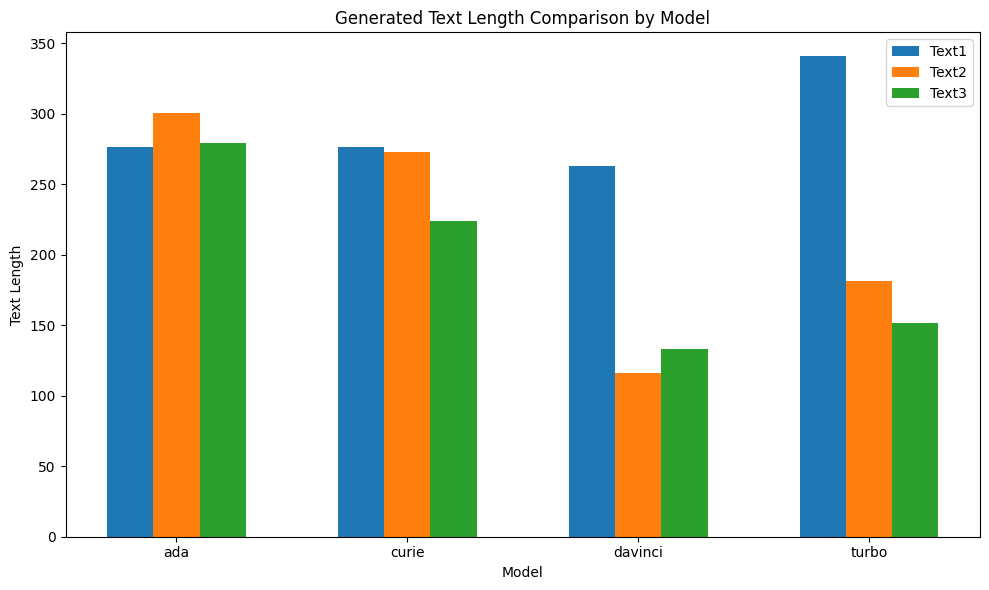

In [17]:
#1-	Comparison of Prompts by Model and Text Length Metric

import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Model': ['ada', 'curie', 'davinci', 'turbo'],
    'Text1': [276.65, 276.65, 262.95, 340.80],
    'Text2': [300.40, 272.90, 116.50, 181.45],
    'Text3': [279.20, 224.25, 133.50, 151.55]
}

df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Position of bars on x-axis
index = range(len(df['Model']))

# Create bars
plt.bar(index, df['Text1'], bar_width, label='Text1')
plt.bar([i + bar_width for i in index], df['Text2'], bar_width, label='Text2')
plt.bar([i + 2 * bar_width for i in index], df['Text3'], bar_width, label='Text3')

# X-axis labels
plt.xlabel('Model')
plt.ylabel('Text Length')

# Title and legend
plt.title('Generated Text Length Comparison by Model')
plt.xticks([i + bar_width for i in index], df['Model'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


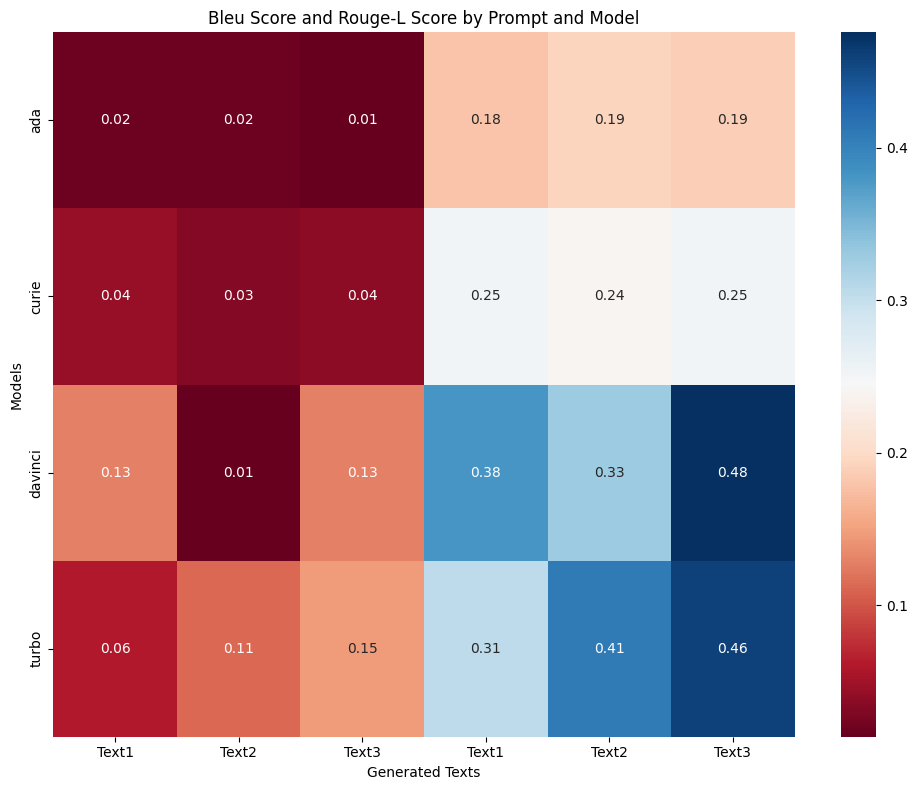

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('mean_metrics.csv')

# Pivot the data for the heatmap
heatmap_data = data.pivot(index='Model', columns='Generated_Texts', values=['Bleu', 'RougeL'])

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='RdBu', annot=True, fmt='.2f', xticklabels=heatmap_data.columns.get_level_values(1), yticklabels=heatmap_data.index)
plt.xlabel('Generated Texts')  # Updated x-axis label
plt.ylabel('Models')
plt.title('Bleu Score and Rouge-L Score by Prompt and Model')
plt.tight_layout()

# Show the plot
plt.show()
